# 한글설치

In [1]:
### 한글 설치 -> 실행 후 런타임 다시 시작 -> 아래 셀부터 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120500 files and direc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 라이브러리

In [1]:
### 라이브러리 임포트
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from numpy import log

import warnings
warnings.filterwarnings("ignore")

# ✅ 신촌동_한식음식점

In [84]:
# 인덱스는 date 컬럼으로, 인덱스 타입은 datetimeIndex로 변경한 채로 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/MC_KDT/프로젝트/파이널프로젝트/데이터/0802_신촌_한식음식점.csv', encoding='cp949', index_col='date', parse_dates=True)
df

,기준_년_코드,기준_분기_코드,총_점포수,점포_수,개업_점포_수,폐업_점포_수,프랜차이즈_점포_수,총_매출_금액,분기당_매출_금액,주중_매출_금액,주말_매출_금액,남성_매출_금액,여성_매출_금액
date,,,,,,,,,,,,,
2017-01-01,2017,1,540,470,11,20,70,34974328196,34974328196,24827752559,10146575637,16800873792,13184344000
2017-04-01,2017,2,535,469,16,21,66,35821251882,35821251882,25052051032,10769200850,16724180268,13984075273
2017-07-01,2017,3,529,465,14,20,64,34372357455,34372357455,23824413320,10547944135,15982890369,13292445563
2017-10-01,2017,4,519,454,14,24,65,37190081157,37190081157,25401224024,11788857133,16975991400,14235261453
2018-01-01,2018,1,512,451,11,18,61,34866478691,34866478691,24404946086,10461532605,16565172666,13182847477
2018-04-01,2018,2,504,441,12,20,63,37268133585,37268133585,26033738087,11234395498,17066341613,14675455599
2018-07-01,2018,3,502,438,19,21,64,35007030665,35007030665,24330940904,10676089761,16307888211,13598036768
2018-10-01,2018,4,505,440,27,24,65,38844032862,38844032862,27567205149,11276827713,17607606899,14896282898
2019-01-01,2019,1,502,442,16,19,60,30832380519,30832380519,21332098945,9500281574,14667201898,13309949630


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2017-01-01 to 2022-10-01
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   기준_년_코드     24 non-null     int64
 1   기준_분기_코드    24 non-null     int64
 2   총_점포수       24 non-null     int64
 3   점포_수        24 non-null     int64
 4   개업_점포_수     24 non-null     int64
 5   폐업_점포_수     24 non-null     int64
 6   프랜차이즈_점포_수  24 non-null     int64
 7   총_매출_금액     24 non-null     int64
 8   분기당_매출_금액   24 non-null     int64
 9   주중_매출_금액    24 non-null     int64
 10  주말_매출_금액    24 non-null     int64
 11  남성_매출_금액    24 non-null     int64
 12  여성_매출_금액    24 non-null     int64
dtypes: int64(13)
memory usage: 2.6 KB


## train/test 분리

In [86]:
# Statsmodel을 사용하여 시계열 분석을 하기 위해 freq 설정
df.index.freq='QS'

In [87]:
# train, test 데이터셋 분할
df_train = df.iloc[:20, :]
df_test = df.iloc[20:, :]

# 인덱스, freq 재설정
df_train.index = pd.date_range(start = df_train.index[0], periods=len(df_train), freq='QS')
df_test.index = pd.date_range(start=df_test.index[0], periods=len(df_test), freq='QS')

# 훈련, 테스트셋 모양 확인
df_train.shape, df_test.shape

((20, 13), (4, 13))

In [88]:
# 결과확인
df_test['총_매출_금액']

2022-01-01    18111018888
2022-04-01    25275820262
2022-07-01    25138614612
2022-10-01    29617724330
Freq: QS-JAN, Name: 총_매출_금액, dtype: int64

Text(0.5, 1.0, 'train 실제 데이터')

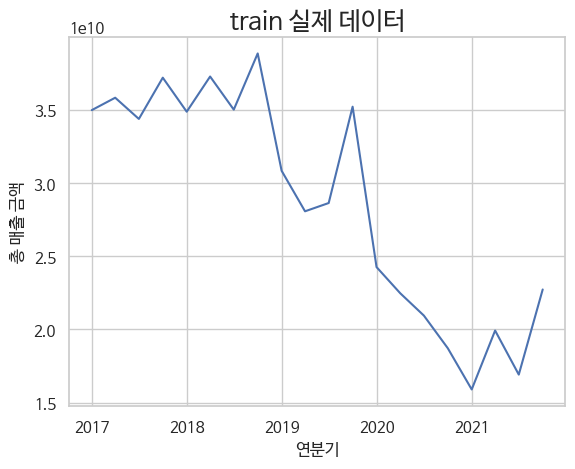

In [89]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

fig, ax = plt.subplots()
ax.plot(df_train.index, df_train['총_매출_금액'])
ax.set_ylabel('총 매출 금액')
ax.set_xlabel('연분기')
ax.set_title('train 실제 데이터', size=18)

# ETS 분해

https://github.com/SooyeonWon/time_series_analytics/blob/main/Time_Series_Predictive_Analytics%20.ipynb

Text(0.5, 0, '연분기')

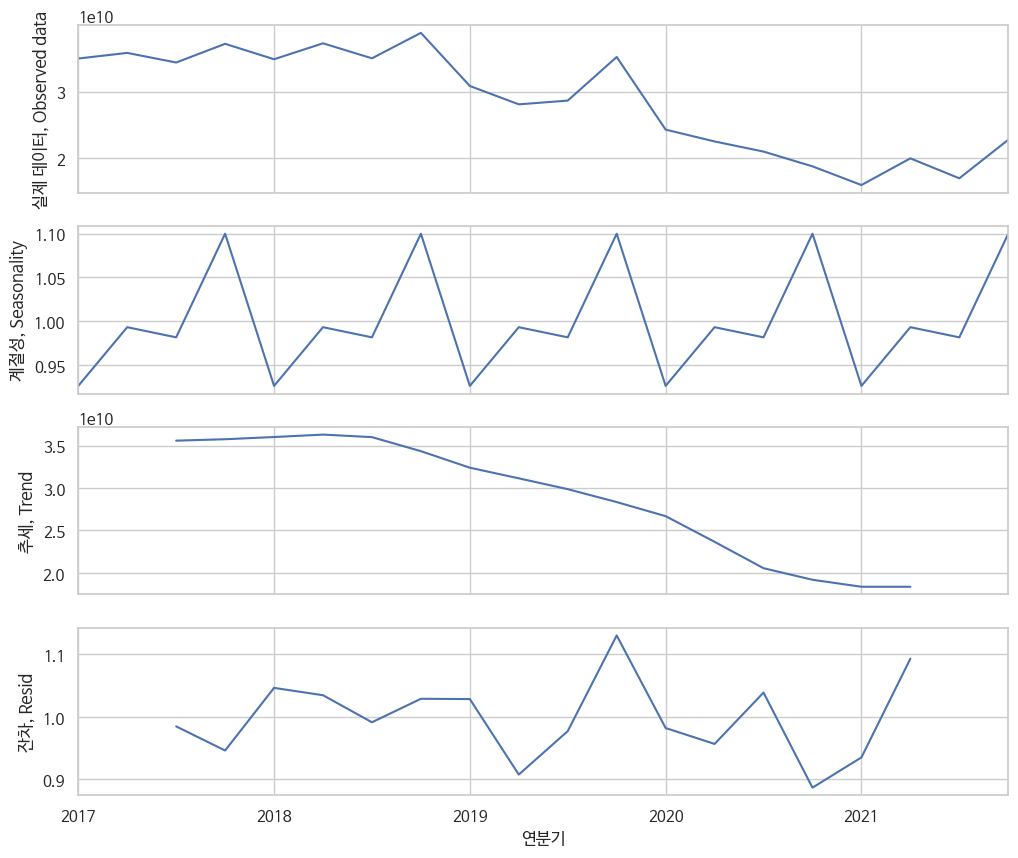

In [90]:
### ETS 분해
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(df_train['총_매출_금액'], model='mul', period=4)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(12,10), sharex= True)
res.observed.plot(ax=ax1)
ax1.set_ylabel('실제 데이터, Observed data')
res.seasonal.plot(ax=ax2)
ax2.set_ylabel('계절성, Seasonality')
res.trend.plot(ax=ax3)
ax3.set_ylabel('추세, Trend')
res.resid.plot(ax=ax4)
ax4.set_ylabel('잔차, Resid')

plt.xlabel("연분기")

# ETS 모델

In [91]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [92]:
df_train = pd.Series(df_train['총_매출_금액']).astype('float64')

# trend, add가 맞는가 한 번 더 검토 필요
ets_model = ETSModel(df_train, error='mul', trend='add', seasonal = 'mul',
                     damped_trend=True, seasonal_periods=4, initial_level=df_train.values.mean(), freq='QS')
ets_fitted = ets_model.fit()

In [93]:
print(ets_fitted.summary())

                                 ETS Results                                  
Dep. Variable:                총_매출_금액   No. Observations:                   20
Model:                      ETS(MAdM)   Log Likelihood                -464.909
Date:                Wed, 02 Aug 2023   AIC                            951.818
Time:                        06:15:13   BIC                            962.771
Sample:                    01-01-2017   HQIC                           953.956
                         - 10-01-2021   Scale                            0.012
Covariance Type:               approx                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
smoothing_level        0.9999      0.283      3.527      0.000       0.444       1.556
smoothing_trend     9.999e-05        nan        nan        nan         nan         nan
smoothing_seasonal  

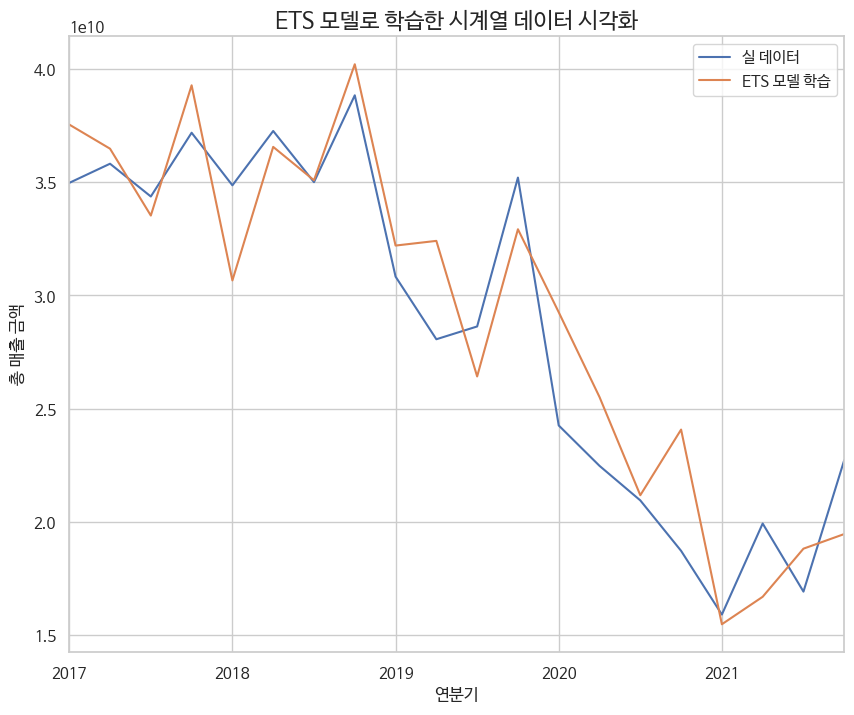

In [94]:
plt.figure(figsize=(10,8))
df_train.plot(label='실 데이터')
ets_fitted.fittedvalues.plot(label='ETS 모델 학습')
plt.title('ETS 모델로 학습한 시계열 데이터 시각화' , fontsize=16)
plt.ylabel("총 매출 금액");
plt.xlabel("연분기")
plt.legend();

In [95]:
pred_ets= ets_fitted.fittedvalues

In [96]:
expected_ets = df_train.values
predicted_ets = pred_ets.values

In [97]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

def mean_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) / y_true * 100)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def running_diff(arr, N):
    return np.array([arr[i] - arr[i-N] for i in range(N, len(arr))])

def mean_absolute_scaled_error(training_series, testing_series, prediction_series):
    errors_mean = np.abs(testing_series - prediction_series ).mean()
    d = np.abs(running_diff(training_series, 4) ).mean()
    return errors_mean/d

mse_ets  = mean_squared_error(expected_ets, predicted_ets)
rmse_ets = sqrt(mse_ets)
mae_ets  = mean_absolute_error(expected_ets, predicted_ets)
mpe_ets  = mean_percentage_error(expected_ets, predicted_ets)
mape_ets = mean_absolute_percentage_error(expected_ets, predicted_ets)
mase_ets = mean_absolute_scaled_error(expected_ets, expected_ets, predicted_ets)

print('ETS 모델 오차 확인:')
print('')
print('- RMSE: %.2f' % rmse_ets)
print('- MAE : %.2f' % mae_ets)
print('- MPE : %.2f' % mpe_ets)
print('- MAPE: %.2f' % mape_ets)
print('- MASE: %.2f' % mase_ets)

ETS 모델 오차 확인:

- RMSE: 2748447097.04
- MAE : 2260520746.12
- MPE : -2.49
- MAPE: 8.88
- MASE: 0.44


# Seasonal ARIMA

## stationary 확인

In [98]:
# Augmented Dickey Fuller test
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_train.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.991975
p-value: 0.756180


- p-value 값이 유의수준 이하이라서 stationary 처리 필요 없음

In [99]:
# # 실제 데이터 시각화
# fig, axes = plt.subplots(3, 1, figsize=(10,8), dpi=100, sharex=True)

# # Usual Differencing
# axes[0].plot(df_train, label='실제 데이터')
# axes[0].plot(df_train.diff(1), label='Usual Differencing')
# axes[0].set_title('1분기 차분')
# axes[0].legend(loc='upper left', fontsize=10)
# df_diff = df_train.diff(1)

# # Seasonal Differencing
# axes[1].plot(df_train, label='실제 데이터')
# axes[1].plot(df_train.diff(2), label='Seasonal Differencing', color='green')
# axes[1].set_title('2분기 차분')
# axes[1].legend(loc='upper left', fontsize=10)

# # Seasinal first differencing
# axes[2].plot(df_train, label='실제 데이터')
# axes[2].plot(df_diff.diff(4), label='Seasonal First Differencing', color='purple')
# axes[2].set_title('4분기(1년) 차분')
# axes[2].legend(loc='upper left', fontsize=10)
# plt.suptitle('신촌동 한식음식점 총 매출 금액', fontsize=16)
# plt.show()

In [100]:
# # Augmented Dickey Fuller test for Seasonal First Differencing Data
# seasonal_first_differencing = df_diff.diff(4)
# result_seasonal_first_diff = adfuller(seasonal_first_differencing.dropna())
# print('ADF Statistic for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[0])
# print('p-value for Seasonal First Differencing: %.4f' % result_seasonal_first_diff[1])

- ACF 그래프 --> 시계열 데이터의 계절성을 확인
- PACF 그래프 --> 시계열 데이터에서 과거의 특정 시점들이 현재 값에 영향을 미치는지 확인

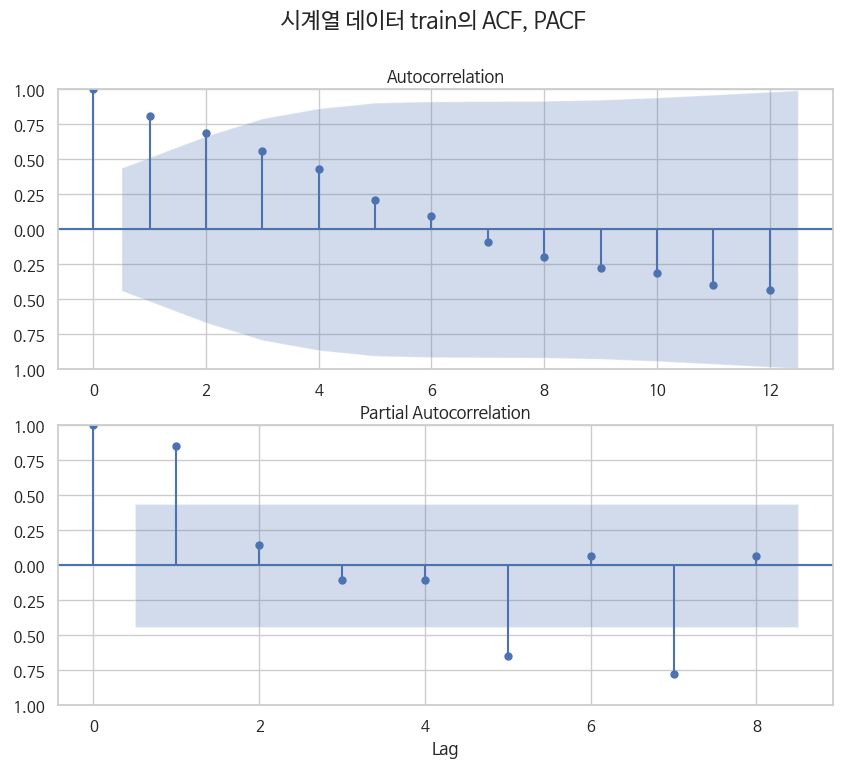

In [101]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(df_train,  lags=12, ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(df_train, lags=8,  ax=ax2)

plt.xlabel('Lag')
plt.suptitle('시계열 데이터 train의 ACF, PACF', fontsize=16)
plt.show()

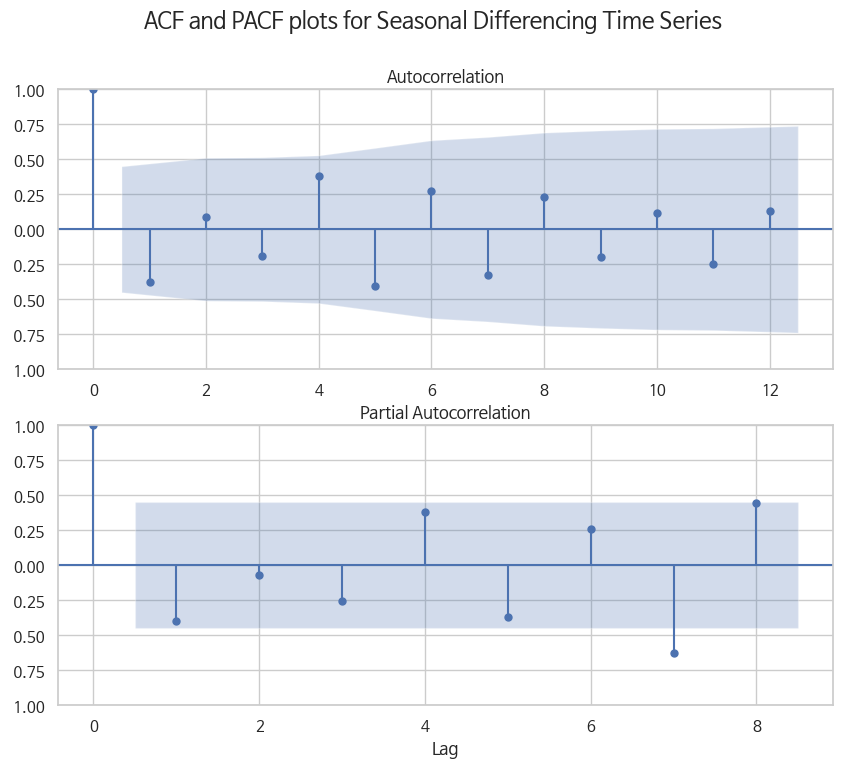

In [102]:
seasonal_diff = running_diff(df_train, 1)

fig = plt.figure(figsize=(10,8))
# 서브플롯 생성 -> 2행 1열의 1열에 위치
ax1 = fig.add_subplot(211)
fig=plot_acf(seasonal_diff, lags=12,  ax=ax1)

# 서브플롯 생성 -> 2행 1열의 2열에 위치
ax2 = fig.add_subplot(212)
fig=plot_pacf(seasonal_diff, lags=8,  ax=ax2)

plt.xlabel('Lag')
plt.suptitle('ACF and PACF plots for Seasonal Differencing Time Series', fontsize=16)
plt.show()

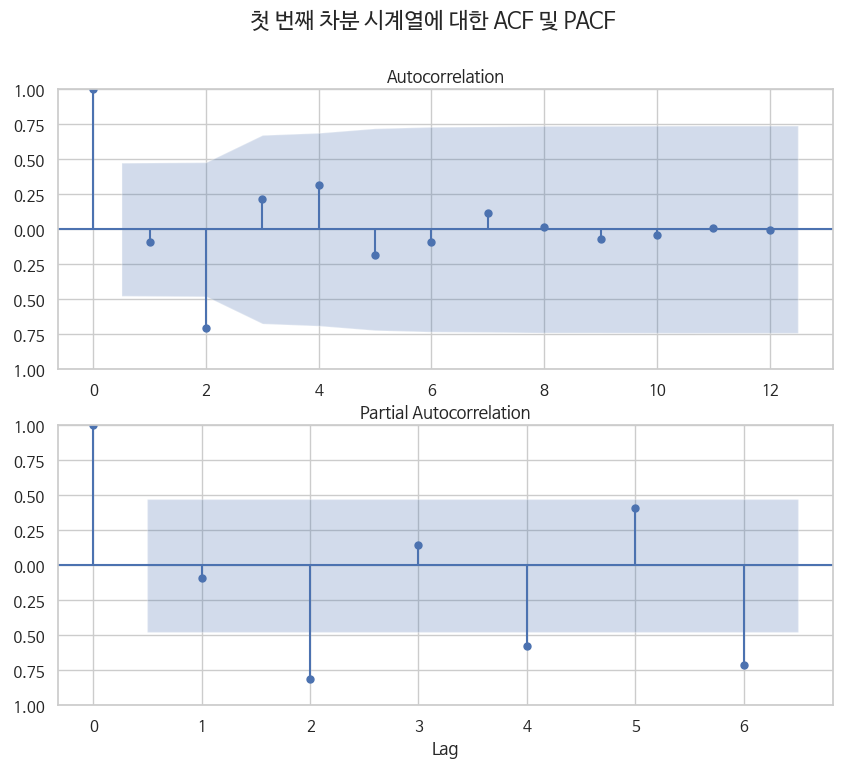

In [103]:
seasonal_diff_1 = running_diff(seasonal_diff, 2)

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(211)
fig=plot_acf(seasonal_diff_1, lags=12,  ax=ax1)

ax2 = fig.add_subplot(212)
fig=plot_pacf(seasonal_diff_1, lags=6,  ax=ax2)

plt.xlabel('Lag')
plt.suptitle('첫 번째 차분 시계열에 대한 ACF 및 PACF', fontsize=16)
plt.show()

In [104]:
# 모델 생성
model_sarima = sm.tsa.statespace.SARIMAX(endog = df_train,
                                         order=(0, 1, 1), seasonal_order=(0,1,0,4),
                                         trend = 't', freq = 'QS',
                                         seasonal_periods =4,
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
# 학습
sarima_fitted = model_sarima.fit(dynamic=False)
print(sarima_fitted.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            총_매출_금액   No. Observations:                   20
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 4)   Log Likelihood                -309.449
Date:                            Wed, 02 Aug 2023   AIC                            624.899
Time:                                    06:15:17   BIC                            626.593
Sample:                                01-01-2017   HQIC                           624.550
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       1.867e+08   4.31e-10   4.33e+17      0.000    1.87e+08    1.87e+08
ma.L1          0.1362      0.249   

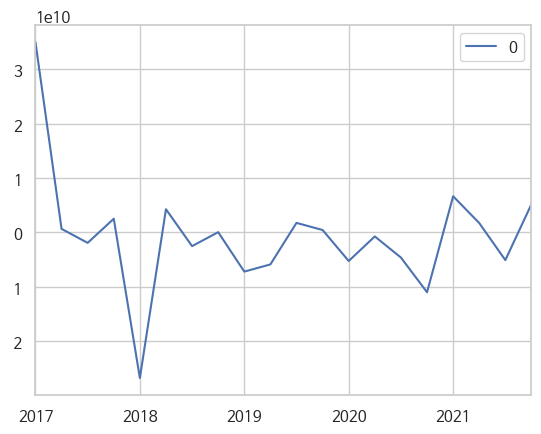

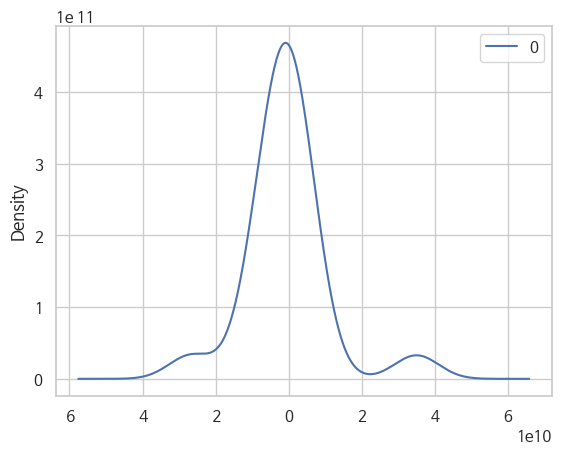

                  0
count  2.000000e+01
mean  -6.306487e+08
std    1.105882e+10
min   -2.672944e+10
25%   -5.118902e+09
50%   -3.378510e+08
75%    1.948604e+09
max    3.497433e+10


In [105]:
residuals = pd.DataFrame(sarima_fitted.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

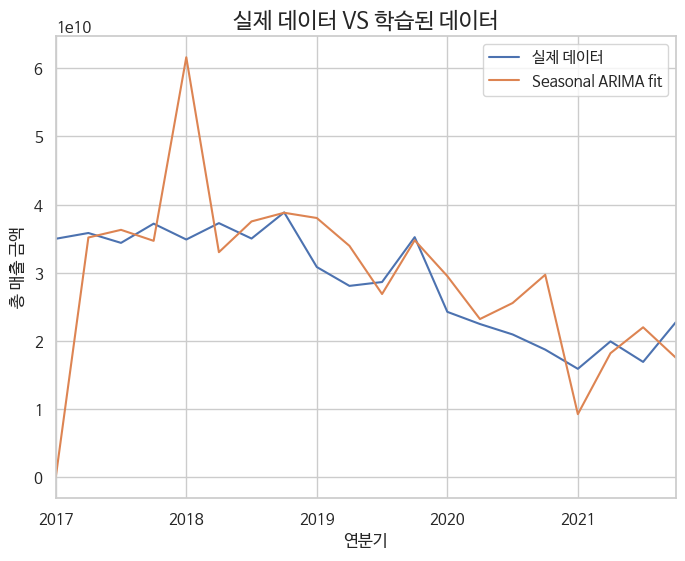

In [106]:
# 실제 데이터와 학습된 데이터 값 비교
df_train.plot(label='실제 데이터',figsize=(8,6))
sarima_fitted.fittedvalues.plot(label='Seasonal ARIMA fit')
plt.ylabel("총 매출 금액");
plt.xlabel("연분기")
plt.title('실제 데이터 VS 학습된 데이터', fontsize= 16)
plt.legend();

In [107]:
predicted_sarima = sarima_fitted.predict().values
expected_sarima = df_train.values

mse_sarima  = mean_squared_error(expected_sarima, predicted_sarima)
rmse_sarima = sqrt(mse_sarima)
mae_sarima  = mean_absolute_error(expected_sarima, predicted_sarima)
mpe_sarima  = mean_percentage_error(expected_sarima, predicted_sarima)
mape_sarima = mean_absolute_percentage_error(expected_sarima, predicted_sarima)
mase_sarima = mean_absolute_scaled_error(expected_sarima, expected_sarima, predicted_sarima)

print('In-Sample Error Measures of Seasonal ARIMA Models:')
print(' ')
print('- RMSE : %f' % rmse_sarima)
print('- MAE  : %f' % mae_sarima)
print('- MPE  : %f' % mpe_sarima)
print('- MAPE : %f' % mape_sarima)
print('- MASE : %f' % mase_sarima)

In-Sample Error Measures of Seasonal ARIMA Models:
 
- RMSE : 10797237931.470982
- MAE  : 6454229092.744974
- MPE  : -3.413795
- MAPE : 23.503191
- MASE : 1.253494


# ETS 모델 검증

In [108]:
# ETS Model for Validation
df_data = pd.Series(df['총_매출_금액']).astype('float64')
ets_model_holdout = ETSModel(df_data, error='mul', trend='mul', seasonal = 'mul',
                             damped_trend=True, seasonal_periods=12,
                             initial_level=df_data.values.mean(), freq='QS')
ets_fitted_holdout = ets_model_holdout.fit()

In [109]:
df_data

date
2017-01-01    3.497433e+10
2017-04-01    3.582125e+10
2017-07-01    3.437236e+10
2017-10-01    3.719008e+10
2018-01-01    3.486648e+10
2018-04-01    3.726813e+10
2018-07-01    3.500703e+10
2018-10-01    3.884403e+10
2019-01-01    3.083238e+10
2019-04-01    2.806542e+10
2019-07-01    2.863045e+10
2019-10-01    3.520895e+10
2020-01-01    2.425637e+10
2020-04-01    2.247180e+10
2020-07-01    2.094498e+10
2020-10-01    1.871640e+10
2021-01-01    1.590054e+10
2021-04-01    1.992355e+10
2021-07-01    1.691447e+10
2021-10-01    2.272617e+10
2022-01-01    1.811102e+10
2022-04-01    2.527582e+10
2022-07-01    2.513861e+10
2022-10-01    2.961772e+10
Freq: QS-JAN, Name: 총_매출_금액, dtype: float64

In [110]:
# Predicted values for holdout samples (test samples) - ETS model
ets_fitted_holdout.predict()[20:]

date
2022-01-01    1.796020e+10
2022-04-01    2.222343e+10
2022-07-01    2.574188e+10
2022-10-01    3.324218e+10
Freq: QS-JAN, dtype: float64

# Seasonal ARIMA 모델 검증

In [111]:
# Seasonal ARIMA Model for Validation
model_sarima_holdout = sm.tsa.statespace.SARIMAX(endog = df_data,
                                                 order=(0, 1, 1), seasonal_order=(0,1,0,4),
                                                 trend = 't', freq = 'QS',
                                                 seasonal_periods =4,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
sarima_fitted_holdout = model_sarima_holdout.fit(dynamic=False)

In [112]:
# Predicted values for holdout samples (test samples) - Seasonal ARIMA model
sarima_fitted_holdout.predict()[20:]

date
2022-01-01    2.219161e+10
2022-04-01    2.529329e+10
2022-07-01    2.523516e+10
2022-10-01    3.405994e+10
Freq: QS-JAN, Name: predicted_mean, dtype: float64

# ETS vs SARIMA

In [113]:
holdout_results = pd.DataFrame({'실제 데이터': df_test['총_매출_금액'],
                                 'predicted_ETS': ets_fitted_holdout.predict()[20:].values,
                                 'predicted_ARIMA': sarima_fitted_holdout.predict()[20:].values },
                               index = df_test.index)
holdout_results

,실제 데이터,predicted_ETS,predicted_ARIMA
2022-01-01,18111018888,1.796020e+10,2.219161e+10
2022-04-01,25275820262,2.222343e+10,2.529329e+10
2022-07-01,25138614612,2.574188e+10,2.523516e+10
2022-10-01,29617724330,3.324218e+10,3.405994e+10


In [114]:
df_train

2017-01-01    3.497433e+10
2017-04-01    3.582125e+10
2017-07-01    3.437236e+10
2017-10-01    3.719008e+10
2018-01-01    3.486648e+10
2018-04-01    3.726813e+10
2018-07-01    3.500703e+10
2018-10-01    3.884403e+10
2019-01-01    3.083238e+10
2019-04-01    2.806542e+10
2019-07-01    2.863045e+10
2019-10-01    3.520895e+10
2020-01-01    2.425637e+10
2020-04-01    2.247180e+10
2020-07-01    2.094498e+10
2020-10-01    1.871640e+10
2021-01-01    1.590054e+10
2021-04-01    1.992355e+10
2021-07-01    1.691447e+10
2021-10-01    2.272617e+10
Freq: QS-JAN, Name: 총_매출_금액, dtype: float64

## 오차비교

In [115]:
# Holdout-Sample Errors Comparison
# ETS Model
mse_ets_hos  = mean_squared_error(df_test['총_매출_금액'], holdout_results['predicted_ETS'])
rmse_ets_hos = sqrt(mse_ets_hos)
mae_ets_hos  = mean_absolute_error(df_test['총_매출_금액'], holdout_results['predicted_ETS'])
mpe_ets_hos  = mean_percentage_error(df_test['총_매출_금액'], holdout_results['predicted_ETS'])
mape_ets_hos = mean_absolute_percentage_error(df_test['총_매출_금액'], holdout_results['predicted_ETS'])
mase_ets_hos = mean_absolute_scaled_error(df_train.values, df_test['총_매출_금액'], holdout_results['predicted_ETS'])

print('ETS 모델의 표본 오차 측정치:')
print(' ')
print('- RMSE : %.3f' % rmse_ets_hos)
print('- MAE  : %.3f' % mae_ets_hos)
print('- MPE  : %.3f' % mpe_ets_hos)
print('- MAPE : %.3f' % mape_ets_hos)
print('- MASE : %.3f' % mase_ets_hos)
print(' ')


# (Seasonal) ARIMA Model
mse_sarima_hos  = mean_squared_error(df_test['총_매출_금액'], holdout_results['predicted_ARIMA'])
rmse_sarima_hos = sqrt(mse_sarima_hos)
mae_sarima_hos  = mean_absolute_error(df_test['총_매출_금액'],  holdout_results['predicted_ARIMA'])
mpe_sarima_hos  = mean_percentage_error(df_test['총_매출_금액'],  holdout_results['predicted_ARIMA'])
mape_sarima_hos = mean_absolute_percentage_error(df_test['총_매출_금액'],  holdout_results['predicted_ARIMA'])
mase_sarima_hos = mean_absolute_scaled_error(df_train.values, df_test['총_매출_금액'],  holdout_results['predicted_ARIMA'])
print(' ')
print('Seasonal Arima 모델의 표본 오차 측정치:')
print(' ')
print('- RMSE : %.3f' % rmse_sarima_hos)
print('- MAE  : %.3f' % mae_sarima_hos)
print('- MPE  : %.3f' % mpe_sarima_hos)
print('- MAPE : %.3f' % mape_sarima_hos)
print('- MASE : %.3f' % mase_sarima_hos)

ETS 모델의 표본 오차 측정치:
 
- RMSE : 2389583014.507
- MAE  : 1857733882.541
- MPE  : -0.432
- MAPE : 6.887
- MASE : 0.361
 
 
Seasonal Arima 모델의 표본 오차 측정치:
 
- RMSE : 3016376106.062
- MAE  : 2159203861.245
- MPE  : -9.496
- MAPE : 9.496
- MASE : 0.419


# 미래예측_ETS

In [116]:
# ETS Model 예측
ets_model_final = ETSModel(df_data, error='mul', trend='mul', seasonal = 'mul',
                           damped_trend=True, seasonal_periods=4,
                           initial_level=df_data.values.mean(), freq='QS')

# 학습
ets_fitted_final = ets_model_final.fit()

In [117]:
# 미래 예측
ets_forecast_periods = 4  # 미래에 예측하고자 하는 기간
ets_fcast = ets_fitted_final.forecast(steps=ets_forecast_periods)

# 예측값 출력
print(ets_fcast)

2023-01-01    2.405544e+10
2023-04-01    2.691595e+10
2023-07-01    2.548079e+10
2023-10-01    2.927853e+10
Freq: QS-JAN, Name: simulation, dtype: float64


In [118]:
# 미래 예측
ets_forecast_periods = 4  # 미래에 예측하고자 하는 기간
ets_forecast = ets_fitted_final.get_prediction(start=len(df_data), end=len(df_data)+ets_forecast_periods-1)

# 예측 결과를 데이터프레임으로 저장 alpha=0.05 ==> 95%의 신뢰구간을 의미함
ets_forecast_results = ets_forecast.summary_frame(alpha=0.05)

# 결과 출력
ets_forecast_results.index = pd.date_range(start=ets_forecast_results.index[0], periods=len(ets_forecast_results), freq='QS')

### 컬럼명 변경
ets_forecast_results.rename(columns={'mean':'예측값', 'mean_numerical':'예측값의 수치적 평균값', 'pi_lower':'forecast_low_95', 'pi_upper':'forecast_high_95'}, inplace=True)
ets_forecast_results

,예측값,예측값의 수치적 평균값,forecast_low_95,forecast_high_95
2023-01-01,2.405544e+10,2.395143e+10,1.878698e+10,2.966307e+10
2023-04-01,2.691595e+10,2.691633e+10,1.952713e+10,3.582882e+10
2023-07-01,2.548079e+10,2.560581e+10,1.720660e+10,3.638641e+10
2023-10-01,2.927853e+10,2.945329e+10,1.889483e+10,4.305376e+10


- Mean_numerical 컬럼 --> 예측값의 수치적인 평균값
- pi_lower와 pi_upper 컬럼 --> 각각 예측값의 신뢰구간의 하한과 상한
---
예측값의 평균값 (Mean of Predicted Values):
예측값의 평균값은 모델을 통해 얻은 예측값들의 평균을 의미합니다. 즉, 모든 예측값을 더한 후 총 예측값의 개수로 나눈 값입니다. 이는 모델이 예측한 평균적인 값으로, 예측값들의 중심 위치를 나타냅니다.

예측값의 수치적인 평균값 (Numerical Mean of Predicted Values):
예측값의 수치적인 평균값은 실제 예측값들의 수치적인 평균을 의미합니다. 실제 예측값들은 모델을 통해 얻은 예측값들의 샘플입니다. 이 샘플들을 정확히 평균 내어 계산한 값으로, 실제 예측값들의 평균적인 위치를 나타냅니다.

예측값의 평균값과 예측값의 수치적인 평균값은 보통 큰 차이가 나지 않습니다. 이는 예측값들이 대부분 비슷한 값 주위에 집중되어 있기 때문입니다. 하지만 경우에 따라서 예측값들이 크게 퍼져 있을 수 있으므로, 두 평균값을 함께 확인하는 것이 예측의 신뢰성을 평가하는 데 도움이 될 수 있습니다.

## 결과

Text(0.5, 1.0, '신촌동 한식음식점 2023년 매출 예측 (ETS)')

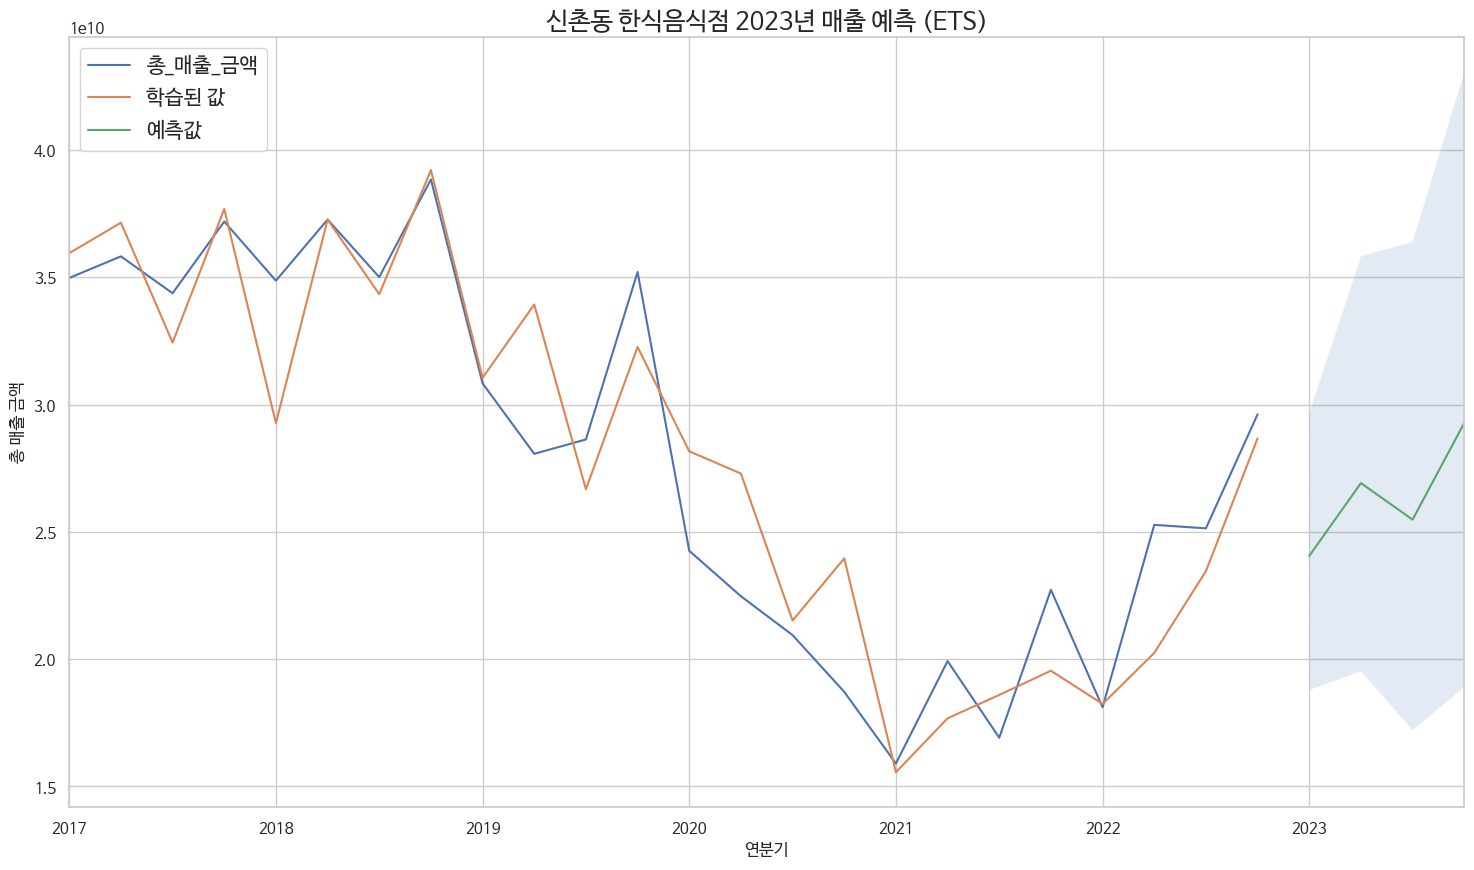

In [119]:
# 미래예측 시각화
df_data.plot(figsize=(18,10))
ets_fitted_final.fittedvalues.plot(label = '학습된 값')
ets_forecast_results.예측값.plot()
upper_series_95 = ets_forecast_results.forecast_high_95
lower_series_95 = ets_forecast_results.forecast_low_95

plt.fill_between(lower_series_95.index,
                 lower_series_95,
                 upper_series_95,
                 color= None, linestyle ='--', alpha=.15)
plt.legend(loc = 'upper left', fontsize =15)
plt.xlabel('연분기')
plt.ylabel('총 매출 금액')
plt.title('신촌동 한식음식점 2023년 매출 예측 (ETS)', fontsize = 18)

# 미래예측_SARIMA

In [120]:
# Seasonal ARIMA 모델 예측
model_sarima_final = sm.tsa.statespace.SARIMAX(df_data, order=(0, 1, 1),
                                             seasonal_order=(0,1,0,4), trend = 't',
                                             seasonal_periods =4,
                                             enforce_stationarity=False, enforce_invertibility=False)
# 학습
sarima_fitted_final = model_sarima_final.fit(dynamic=False)

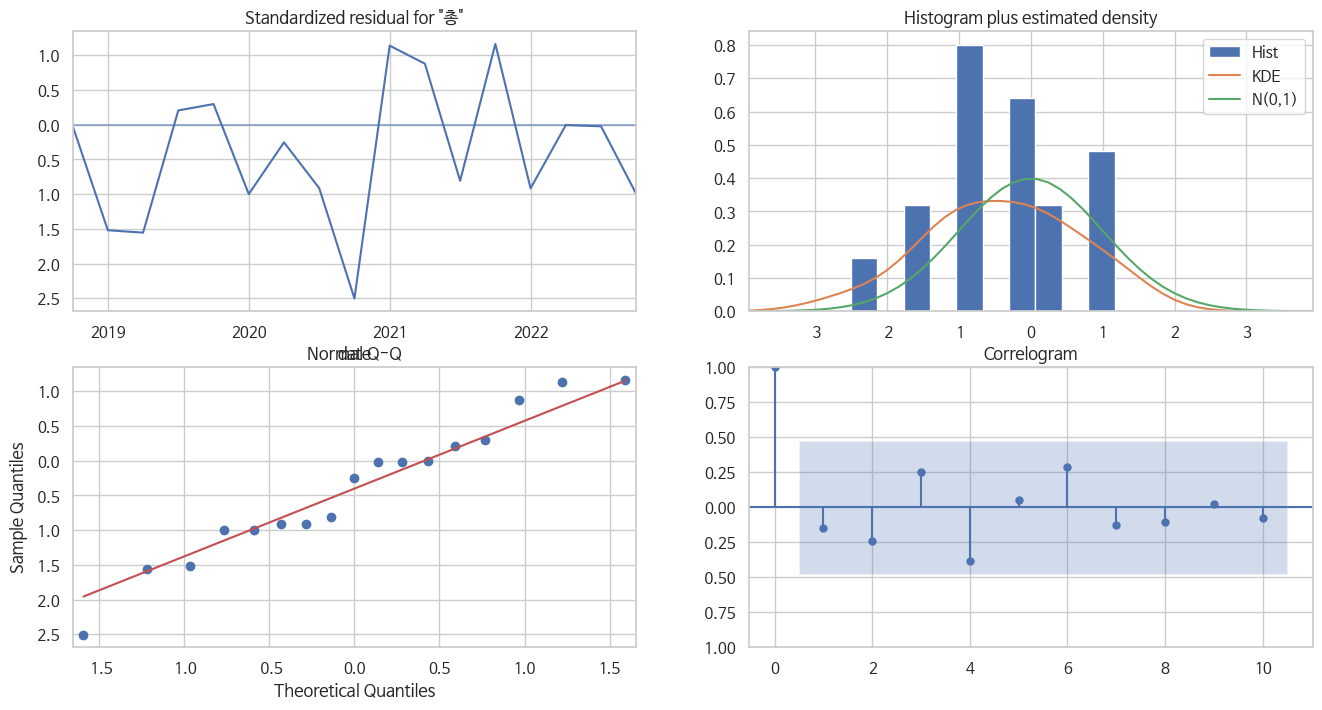

In [121]:
sarima_fitted_final.plot_diagnostics(figsize=(16, 8))
plt.show()

In [122]:
# 4분기 총 매출 금액 예측하기
fcast = sarima_fitted_final.get_forecast(4)
forecast_results = pd.DataFrame({'예측값': fcast.predicted_mean,
                                 'forecast_high_95': fcast.conf_int(alpha= 0.05).iloc[:,1],
                                 'forecast_high_80': fcast.conf_int(alpha= 0.20).iloc[:,1],
                                 'forecast_low_80': fcast.conf_int(alpha= 0.20).iloc[:,0],
                                 'forecast_low_95': fcast.conf_int(alpha= 0.05).iloc[:,0],
                                })
forecast_results.index = pd.date_range(start=forecast_results.index[0] , periods=len(forecast_results), freq='QS')
forecast_results

,예측값,forecast_high_95,forecast_high_80,forecast_low_80,forecast_low_95
2023-01-01,2.859541e+10,3.732778e+10,3.430520e+10,2.288562e+10,1.986305e+10
2023-04-01,3.913183e+10,5.099663e+10,4.688981e+10,3.137385e+10,2.726703e+10
2023-07-01,4.250111e+10,5.682915e+10,5.186971e+10,3.313250e+10,2.817306e+10
2023-10-01,5.062156e+10,6.704752e+10,6.136192e+10,3.988121e+10,3.419560e+10


## 결과

Text(0.5, 1.0, '신촌동 한식음식점 2023년 매출 예측 (SARIMA)')

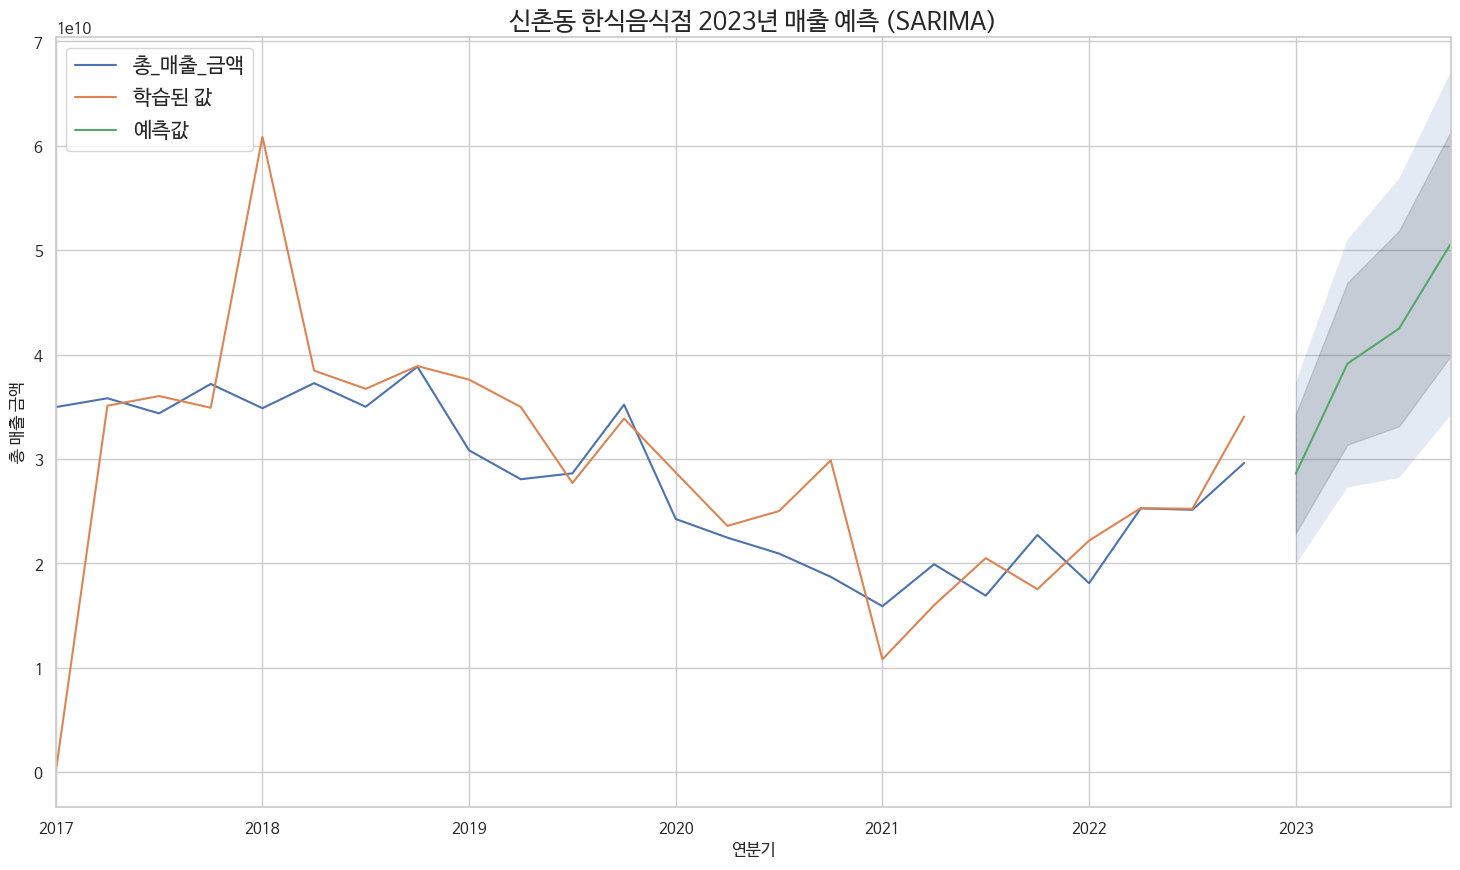

In [123]:
# 미래예측 시각화
df_data.plot(figsize=(18,10))
sarima_fitted_final.fittedvalues.plot(label = '학습된 값')
forecast_results.예측값.plot()
upper_series_80 = forecast_results.forecast_high_80
lower_series_80 = forecast_results.forecast_low_80
upper_series_95 = forecast_results.forecast_high_95
lower_series_95 = forecast_results.forecast_low_95

plt.fill_between(upper_series_80.index,
                 lower_series_80,
                 upper_series_80,
                 color='k', alpha=.15)

plt.fill_between(lower_series_95.index,
                 lower_series_95,
                 upper_series_95,
                 color= None, linestyle ='--', alpha=.15)
plt.legend(loc = 'upper left', fontsize =15)
plt.xlabel('연분기')
plt.ylabel('총 매출 금액')
plt.title('신촌동 한식음식점 2023년 매출 예측 (SARIMA)', fontsize = 18)